<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/lectures/module3/linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/IceCreamData.csv")

# Приклад 1

Дані про дохід від продажу морозива за день та температуру надворі

[джерело](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue/data?select=IceCreamData.csv)

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.shape

(500, 2)

## Очищення від викидів

In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column_name in df.select_dtypes(include="number").columns:
  df = remove_outliers(df, column_name)

In [ ]:
df.shape

(496, 2)

## Точкова діаграма

Text(0, 0.5, 'pevenue')

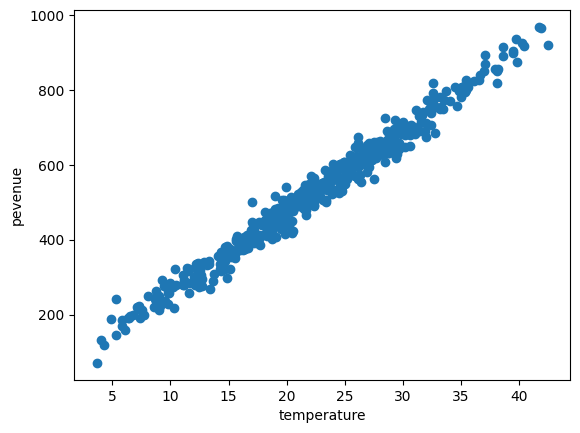

In [ ]:
plt.scatter(df['Temperature'], df['Revenue'])
plt.xlabel('temperature')
plt.ylabel('pevenue')

## Тренування моделі

In [ ]:
y = df['Revenue']
X = df.drop(columns='Revenue')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

LinearRegression()

## Результат

In [ ]:
model.coef_

array([21.44092377])

In [ ]:
model.intercept_

43.699906859236876

<div align="center"><font size='6'> Дохід = 21.4*Температура + 43.7 </font></div>

## Використання

In [ ]:
my_temperature = 25

In [ ]:
model.predict([[my_temperature]]) # треба передавати 2D масив або таблицю pandas.DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([579.72300113])

In [ ]:
21.4*my_temperature +43.7

578.7

## Метрики

In [ ]:
def mae(y_true, y_pred):
  residual = y_true - y_pred

  return residual.abs().mean()

In [ ]:
def mse(y_true, y_pred):
  residual = y_true - y_pred

  return (residual**2).mean()

In [ ]:
def rmse(y_true, y_pred):
  return mse(y_true, y_pred) ** 0.5

In [ ]:
def r2(y_true, y_pred):
  y_mean = y_true.mean()

  return 1 - mse(y_true, y_pred) / mse(y_true, y_mean)

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [ ]:
all_metrics

,train,test
MAE,19.54,20.01
RMSE,24.70,26.29
R2,0.98,0.97


# Приклад 2

Дані про ціну діамантів

[джерело]()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

In [ ]:
df.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


![](https://www.datocms-assets.com/25216/1654106726-m-diamond-cut-1125x540.jpg)

In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
y = df['price']
X = df.drop(columns='price')

In [ ]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


## Обробка категоріальних ознак

In [ ]:
X = pd.get_dummies(X)
X.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,0,0,1,0,0
1,0.21,0,0,0,1,0
2,0.23,0,1,0,0,0
3,0.29,0,0,0,1,0
4,0.31,0,1,0,0,0


## Тренування моделі

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

In [ ]:
all_metrics

,train,test
MAE,990.15,978.43
RMSE,1519.42,1479.17
R2,0.86,0.86


## Коефіцієнти

In [ ]:
model.coef_

array([ 7.86588552e+03, -2.63641125e+16, -2.63641125e+16, -2.63641125e+16,
       -2.63641125e+16, -2.63641125e+16])

In [ ]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

,coef
carat,7.865886e+03
cut_Fair,-2.636411e+16
cut_Good,-2.636411e+16
cut_Ideal,-2.636411e+16
cut_Premium,-2.636411e+16
cut_Very Good,-2.636411e+16


In [ ]:
model.intercept_

2.6364112508416144e+16

## Покращення

In [ ]:
#Будемо шукати лише коефіцієнти, а зсув вважатимемо рівним нулю
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
all_metrics["train without intercept"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test without intercept"] = get_metrics(y_test, model.predict(X_test))
all_metrics

,train,test,train without intercept,test without intercept
MAE,990.15,978.43,990.44,978.55
RMSE,1519.42,1479.17,1519.34,1479.06
R2,0.86,0.86,0.86,0.86


In [ ]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

,coef
carat,7865.885520
cut_Fair,-3828.703812
cut_Good,-2737.775074
cut_Ideal,-2064.145855
cut_Premium,-2435.540191
cut_Very Good,-2357.359277


## Сама модель

<div align="center"><font size='6'> Для Fair:     Ціна = 7865*Карат - 3828 </font></div>
<div align="center"><font size='6'> Для Good:      Ціна = 7865*Карат - 2737 </font></div>
<div align="center"><font size='6'> Для Very Good: Ціна = 7865*Карат - 2357 </font></div>
<div align="center"><font size='6'> Для Premium:   Ціна = 7865*Карат - 2435 </font></div>
<div align="center"><font size='6'> Для Ideal:     Ціна = 7865*Карат - 2064 </font></div>




Гранювання |Модель
-----------|---------------------------
Fair       |Ціна = 7865*Карат - 3828
Good       |Ціна = 7865*Карат - 2737
Very Good  |Ціна = 7865*Карат - 2357
Premium    |Ціна = 7865*Карат - 2435
Ideal      |Ціна = 7865*Карат - 2064

## Використання

In [ ]:
sample = X.sample(1)
sample

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
47415,0.57,0,0,1,0,0


In [ ]:
model.predict(sample)

array([2419.40889086])

In [ ]:
7865*sample['carat'] - 2064

47415    2419.05
Name: carat, dtype: float64

## Проблема

In [ ]:
sample = df[['carat', 'cut']].sample(1)
sample

,carat,cut
45236,0.52,Very Good


In [ ]:
pd.get_dummies(sample)

,carat,cut_Very Good
45236,0.52,1


## Рішення

In [ ]:
y = df['price']
X = df.drop(columns='price')

In [ ]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')

OneHotEncoder(sparse_output=False)

In [ ]:
encoder.fit(X[['cut']])

OneHotEncoder(sparse_output=False)

In [ ]:
sample

,carat,cut
45236,0.52,Very Good


In [ ]:
encoder.transform(sample[['cut']])

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
45236,0.0,0.0,0.0,0.0,1.0


# Приклад 3

Що робити коли є пропущені значення в даних?

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

Штучно добавимо пропущені значення в наші дані

In [ ]:
for column in df.columns:
  mask = np.random.binomial(1, 0.05, size=df.shape[0]).astype(bool)
  df.loc[mask, column] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   51268 non-null  float64
 1   cut     51335 non-null  object 
 2   price   51202 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
df.head()

,carat,cut,price
0,0.23,Ideal,326.0
1,0.21,Premium,326.0
2,0.23,Good,327.0
3,0.29,Premium,334.0
4,0.31,Good,335.0


## Видалення рядків з невідомим значенням у

Видаляємо ті рядки, в яких пропущені значення в стовпчику у(те що наша модель повинна прогнозувати)

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
y = df['price']
X = df.drop(columns='price')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

## Заповнення пропусків

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Для початку нам потрібно отримати назви стовпчиків з числовими та категоріальними ознаками, тому що для них обробка буде відрізнятися

In [ ]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

Для числових ознак заповнюємо пропущені значення в кожному стовпчику його медіаною.

В параметр `steps` передаємо список кортежів з двлма значеннями: назва кроку та сам крок(об'єкт який здійснює обробку)

[(назва1, крок1),

 (назва2, крок2),

  ...
  
  ]

In [ ]:
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

Для категоріальних ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику значенням, яке найчастіше зустрічається
* застосовуємо кодування OneHotEncoder

In [ ]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

Об'єднуємо обробку числових і категоріальних ознак в одну

В параметр `transformers` передаємо список кортежів з трьома значеннями: назва трансформера, сам трансформер, назви або індекси стовпчиків до яких це застосовувати

[(назва1, трансформер1, стовпчики1),

 (назва2, трансформер2, стовпчики2),

  ...
  
  ]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['carat'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['cut'], dtype='object'))])

In [ ]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

array([[0.32, 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.42, 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.7 , 0.  , 0.  , 0.  , 1.  , 0.  ],
       ...,
       [0.38, 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.79, 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 1.  , 0.  , 0.  ]])

Створюємо нову модель

In [ ]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

## Використання

In [ ]:
sample = pd.DataFrame({'carat': [np.nan], 'cut': [np.nan]})
sample

,carat,cut
0,NaN,NaN


In [ ]:
model.predict(sample)

array([3416.])